-05-Basics-of Signalprocessing © by A.Richter (2018)
------------------------------------------

**Overview of the notebook:**
    - Analog vs. Digital Signals
    - Sampling theorem
    - Basic Signal generation
    - Adding up Signals to produce complexity and noise
    - Adding a systematic Trend
    - What the Fourier-Transformation can do
    

**Analog vs. Digital Signals**

Discussing Signalprocessing at first has to distinguish between **analog signals** and **digital signals**. 

Analog signals are generated by all kinds of electric or acoustic meassuring instruments. For example microphones or voltmeters. Their character is generally continous so just like a mathematical definition of a continous function which can evaluate every possible value in its defined borders.

Digital signals on the other hand are discrete and can only have specific values at clearly defined measuring points. They are characterized as vectors or point series.

Working and processing of signals in a computersystem always involves the transformation of an analog signal into a digital representation of the meassured data. The sampling distance of the digitization has to be choses carefully in a way that an oversampling is avoided (to much redundancy - infinitivly small sampling distance) in the same way as an undersampling which is equal to information loss.    

Undersampling is worse because the originally meassured signaldata can not be recreated from the sampled datapoints in this case.



**Sampling theorem**

**Harry Nyquist** and **Claude Shannon** two computer science pioneers analysed this topic clearly and stated their so called **Nyquist-Shannon Sampling Theorem**. 
https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem

It basically says that a periodic signal including a maximal frequency $  f_{max}  $ has to be sampled with a sampling-frequency $f_s \ge 2 \cdot f_{max} $ to avoid any information loss.

See a small example here to emphasize the point:



**Basic Signal generation**

Import of the used libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
%matplotlib inline

A simple Signal can be generated in form of the **Sinus function**
which is displayed below.

Try to use the functions **np.sin()**(numpy) or **sp.sin()**(scipy) instead of the **math.sin()** because the first two can handle arrays and vector structures or lists but math.sin() always needs a scalar value. 

In signal-processing the horizontal x-axis is mostly assigned to the time component of the measurements. That's why in the following I speak about the time-axis. 

Please keep in mind that the signals generated and shown here are always series of discrete values even if they look continous in the plot the computer is calculating with discrete numbers or series of numbers (vectors). 

(50,)
(50,)


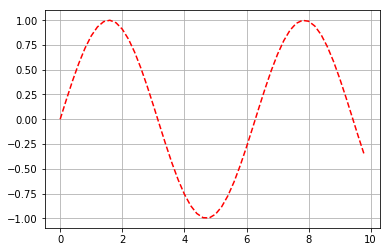

In [3]:
a=np.arange(0,10,0.2)
print(np.ravel(a).shape) 
b=np.sin(a)
#c=math.sin(np.ravel(a))
d=sp.sin(a)
print (d.shape)
plt.plot(a,d,'r--')
plt.grid()
plt.show()

np.arange() is used to generate a list of **1000 points** on the time-axis (1 to 1000, 0.1 step) 

Multiplying the sinus with a factor limits or extends the amplitude/magnitude (it was 1 before) of the function: $x(t)=0.5 \cdot Sin(2\pi t   )$

to the intervall e.g. [$\pm$ Factor] = [-0.5, +0.5] 

Multipying the argument in the Sinus with a factor changes the frequency of the maxima and minima, e.g. like this:

$x(t)=0.5 \cdot Sin(2\pi t \cdot \frac{2}{5}  )$


Try it yourself and plot some more functions like** a*Sin(b*x)**

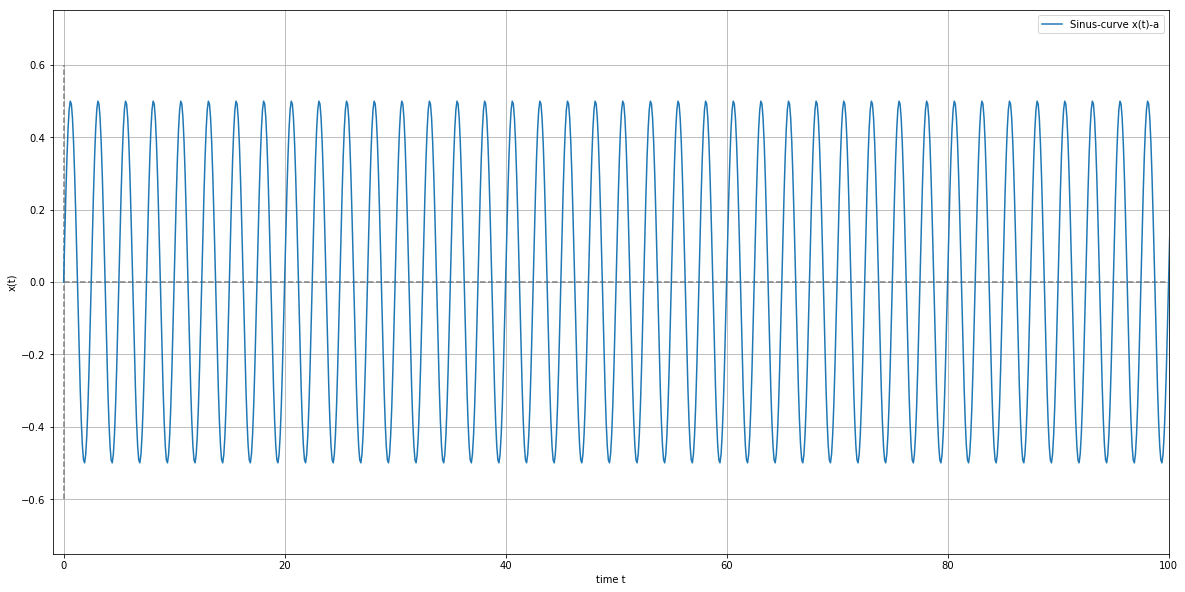

In [4]:
t=np.arange(0,1000,0.1)
x1a=0.5*np.sin(2*np.pi*2*t/5)
fig=plt.figure(figsize=(20,10))
plt.plot(t,x1a,label='Sinus-curve x(t)-a')

plt.hlines(0,0,100,colors='gray',linestyles='--')
plt.vlines(0,-0.6,.6,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(-1,100)
plt.ylim(-0.75,0.75)
plt.show()

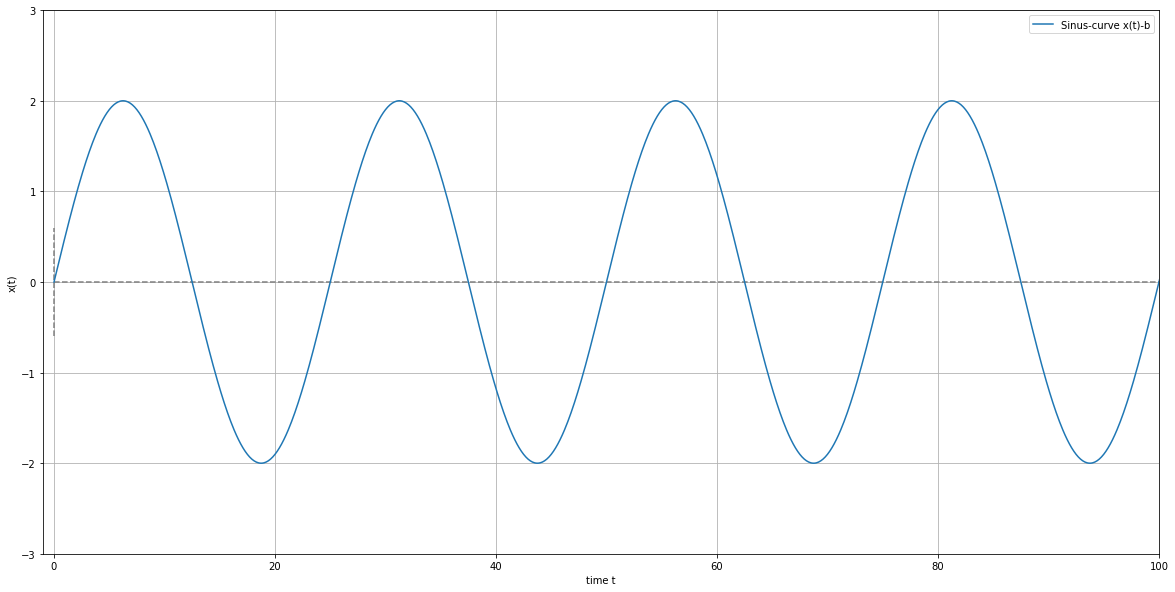

In [5]:
#t=np.arange(0,1000,0.1)
x1b=2*np.sin(2*np.pi*t*2/50)
fig=plt.figure(figsize=(20,10))
plt.plot(t,x1b,label='Sinus-curve x(t)-b')

plt.hlines(0,0,100,colors='gray',linestyles='--')
plt.vlines(0,-0.6,.6,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(-1,100)
plt.ylim(-3,3)
plt.show()

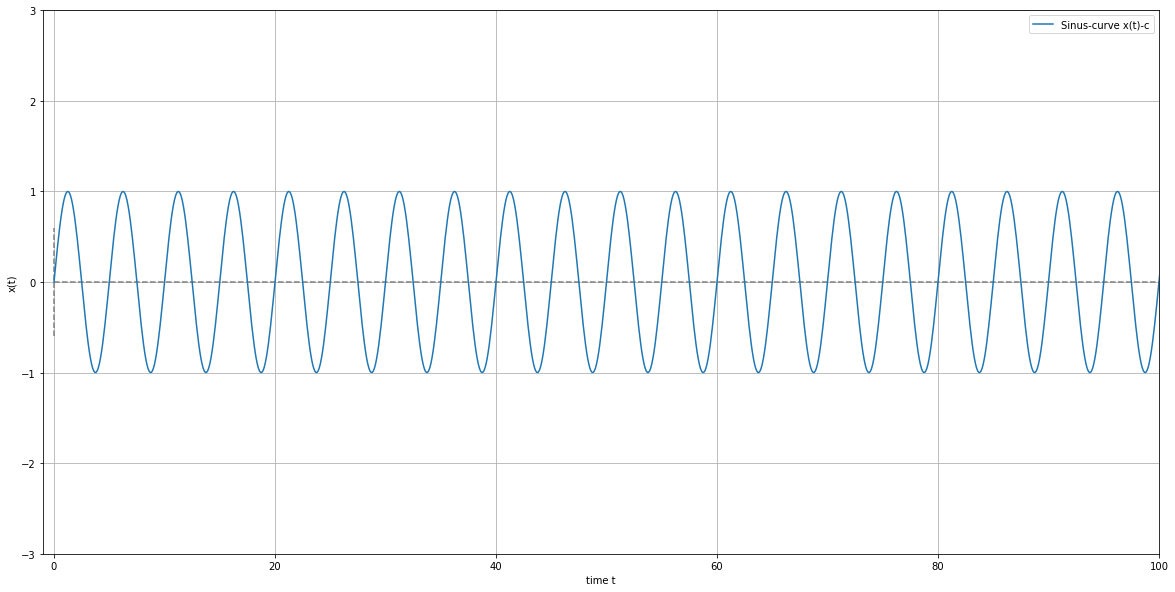

In [6]:
#ein einfaches Signal zur Erklärung/ Veranschaulichung der Signalverarbietung  
#t=np.arange(0,1000,0.1)
x1c=np.sin(2*np.pi*t*2/10)
fig=plt.figure(figsize=(20,10))
plt.plot(t,x1c,label='Sinus-curve x(t)-c')

plt.hlines(0,0,100,colors='gray',linestyles='--')
plt.vlines(0,-0.6,.6,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(-1,100)
plt.ylim(-3,3)
plt.show()

Show all curves in one plot:


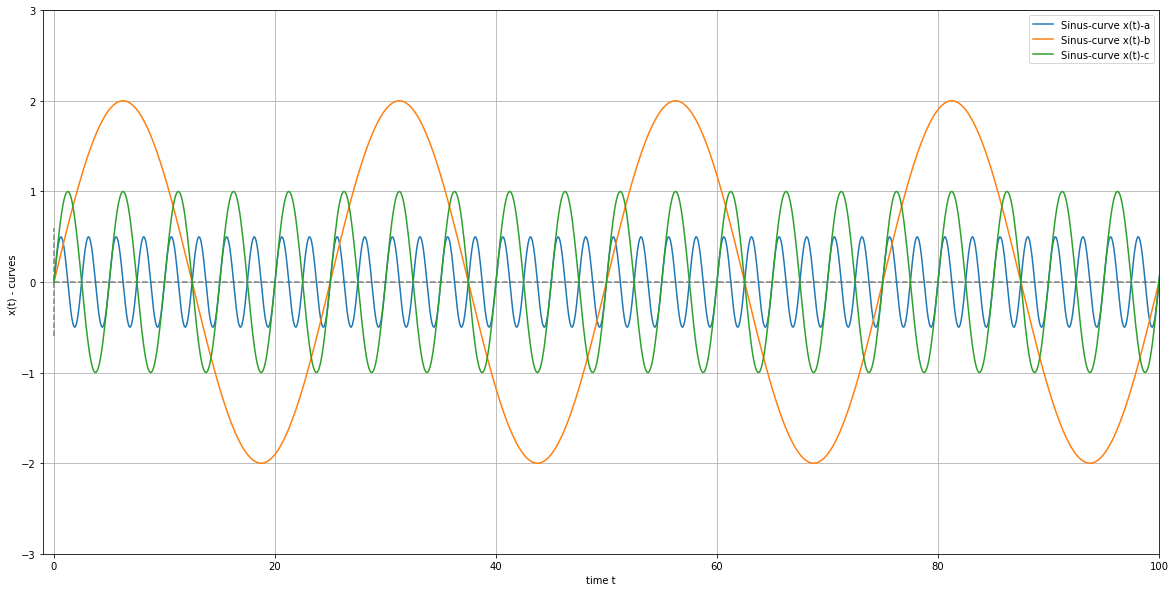

In [7]:
fig=plt.figure(figsize=(20,10))
plt.plot(t,x1a,label='Sinus-curve x(t)-a')
plt.plot(t,x1b,label='Sinus-curve x(t)-b')
plt.plot(t,x1c,label='Sinus-curve x(t)-c')

plt.hlines(0,0,100,colors='gray',linestyles='--')
plt.vlines(0,-0.6,.6,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t) - curves ')
plt.grid()
plt.xlim(-1,100)
plt.ylim(-3,3)
plt.show()

**Adding up Signals to produce complexity and noise**

A more complex Signal can be generated by adding up these three Sinus-functions like:


$x(t)=0.5 \cdot Sin(2\pi t\frac{2}{5}  )  + 2 \cdot Sin(2\pi t\frac{2}{50}  ) +1 \cdot Sin(2\pi t\frac{2}{10}  )$

and plotting it to display

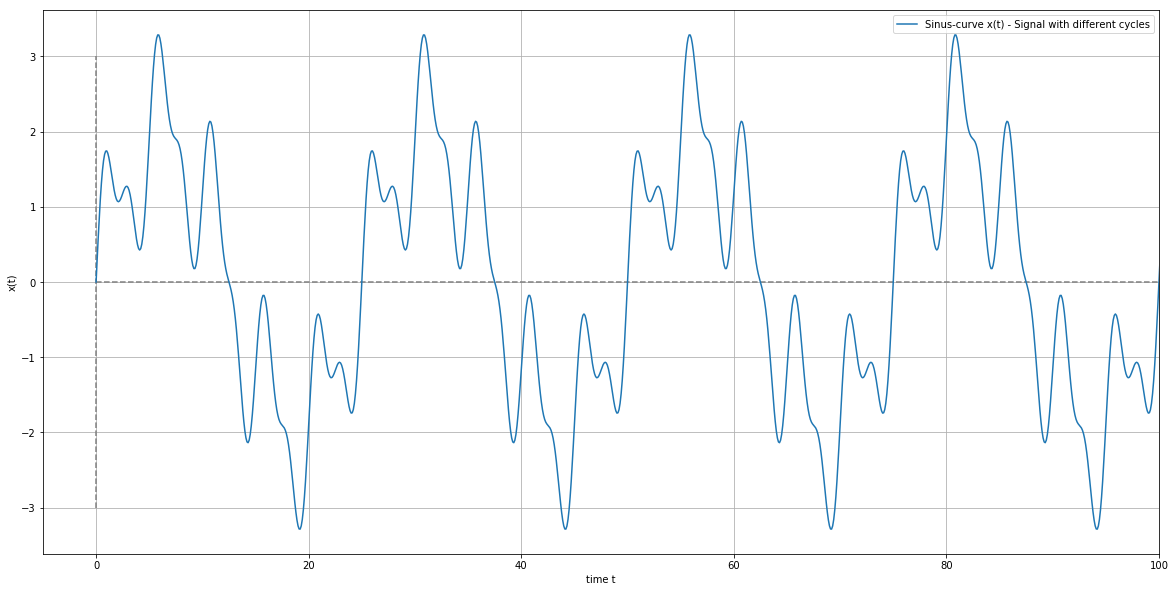

In [8]:

#t=np.arange(1,1000,0.1)
x2=0.5*np.sin(2*np.pi*t*2/5)+    2*np.sin(2*np.pi*t*2/50)+      np.sin(2*np.pi*t*2/10)

#plt.plot(t,x2, label='Signal with noise')

fig=plt.figure(figsize=(20,10))
plt.plot(t,x2,label='Sinus-curve x(t) - Signal with different cycles')

plt.hlines(0,0,200,colors='gray',linestyles='--')
plt.vlines(0,-3,3,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(-5,100)
#plt.ylim(-0.75,0.75)
plt.show()



**Signals with Noise**

Normally signals like this are not free from noise or influences on the meassurements. So to analyse a more realistic case I can simply add random normally distributed errors like in the examples before...


A complex Signal with Gaussian Noise

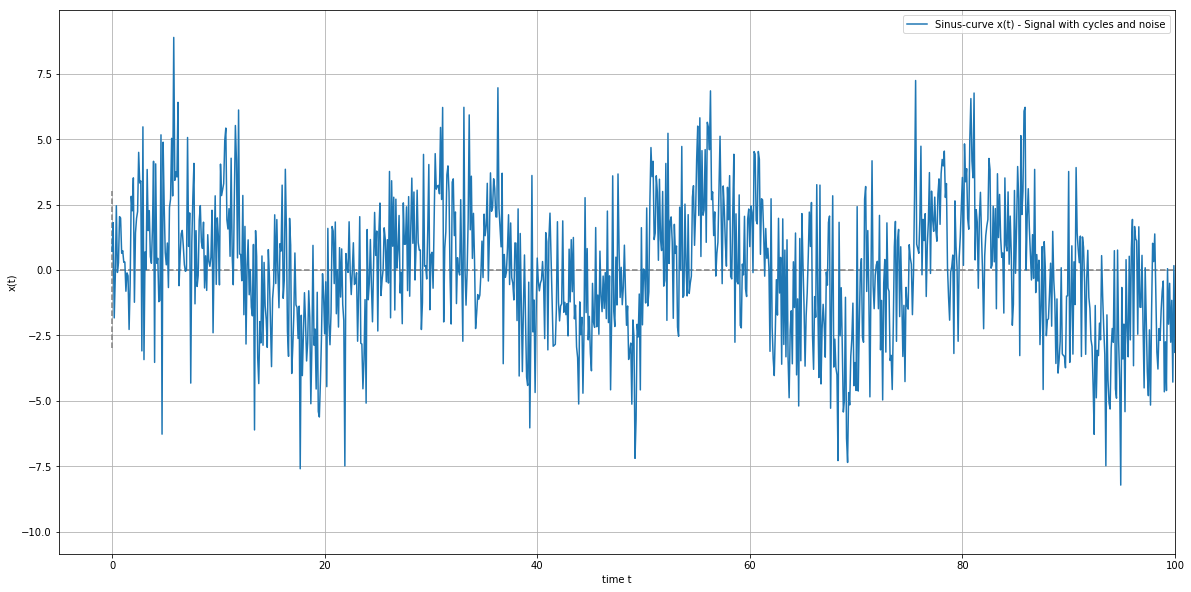

In [9]:
#t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x3=x2+2*np.random.randn(t.shape[0])
#x3=x2+5*np.random.randn(t.shape[0])

fig=plt.figure(figsize=(20,10))
plt.plot(t,x3,label='Sinus-curve x(t) - Signal with cycles and noise')

plt.hlines(0,0,200,colors='gray',linestyles='--')
plt.vlines(0,-3,3,colors='gray',linestyles='--')
plt.legend()
plt.xlabel('time t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(-5,100)
#plt.ylim(-0.75,0.75)
plt.show()


**Adding a systematic Trend**

Realistic signals also tend to underly systematic influences beside the random noise. Such systematic influences are called **Trends**. 

An example for a trend is: http://channel.nationalgeographic.com/videos/ice-age-cycles/

Trends in signals are unlike systematic errors not bound to or caused by an inconvinience of the meassuring system. They are caused by the natural circumstances of the collected data. 

Trends should be eliminated or filtered out within the analysis of a signal. To eleminate a trend a signal can be modelled that fit the trend and than be substracted from the original signal. The difficulty here is only the exact knowledge of the trend.  




A complex Signal with a linear Trend looks for example like this:

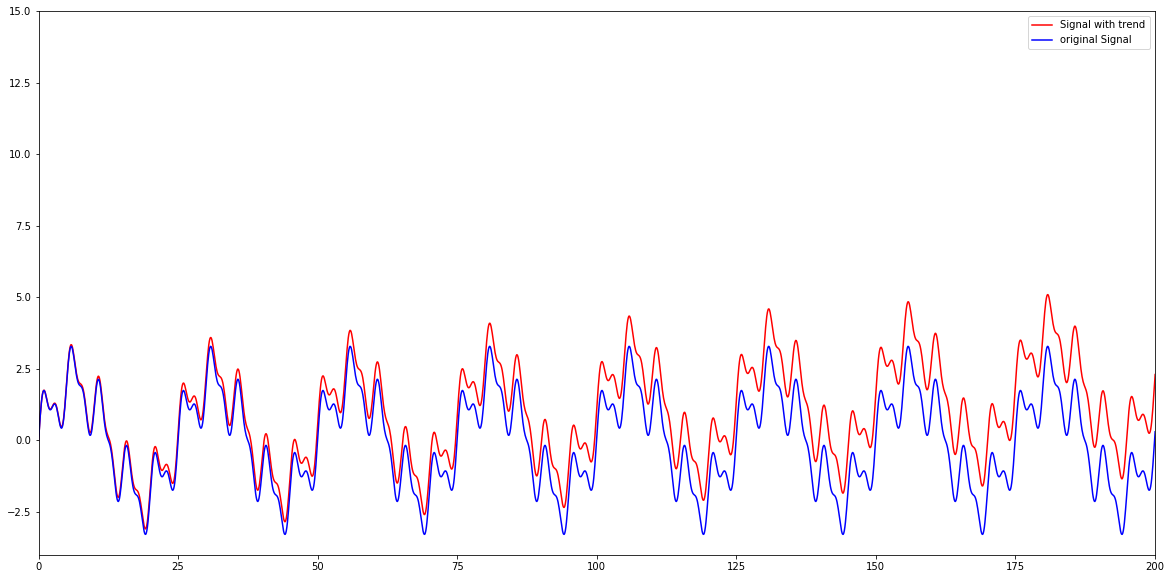

In [10]:
#t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x4=x2+0.01*t

fig=plt.figure(figsize=(20,10))
plt.plot(t,x4,'r', label='Signal with trend')
plt.plot(t,x2,'b', label='original Signal')
plt.xlim(0,200)
plt.ylim(-4,15)
plt.legend()
plt.show()

With a growing value of time the trend in the signal increases.  

There can be of course non-linear trends which are a lot more difficult to model.

When I combine the noise with the trend I can generate a complex Signal like this:

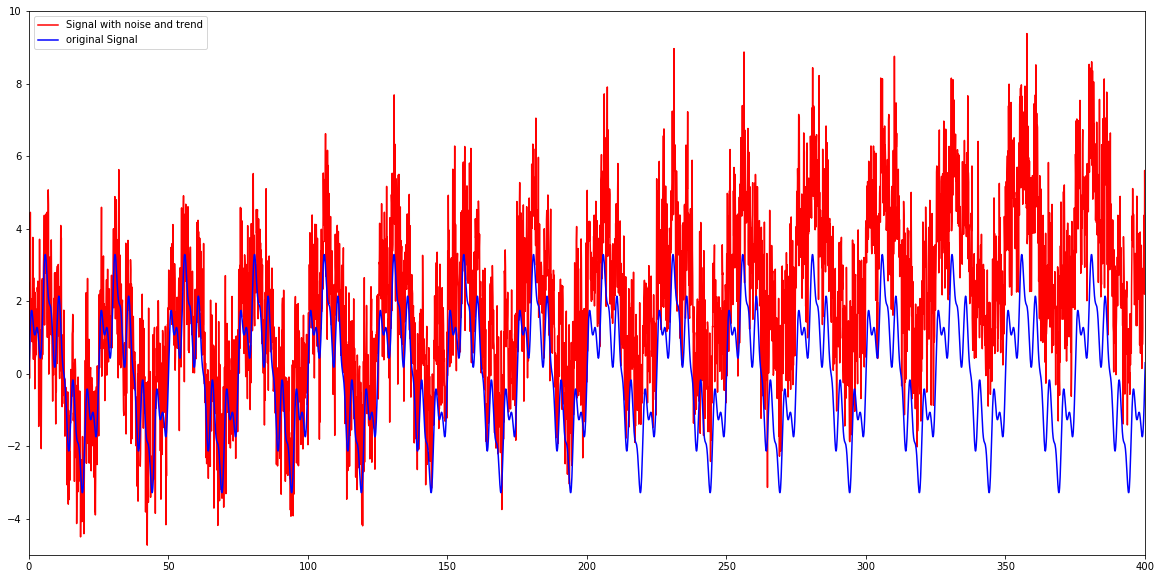

In [12]:
#t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x5=x2+1.2*np.random.randn(t.shape[0])+0.01*t

fig=plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.plot(t,x5,'r', label='Signal with noise and trend')
plt.plot(t,x2,'b', label='original Signal')
plt.xlim(0,400)
plt.ylim(-5,10)
plt.legend()
plt.show()

Reality is eaven more complex!!!
---

https://de.wikipedia.org/wiki/Milankovi%C4%87-Zyklen  |  


**What the Fourier-Transformation can do**

fftfreq()  what does this function do???

finds the cyclic frequencies in the given Signal...which is used to generate the abszisse values to display the spectrum of the signal

(10000,) (10000,)


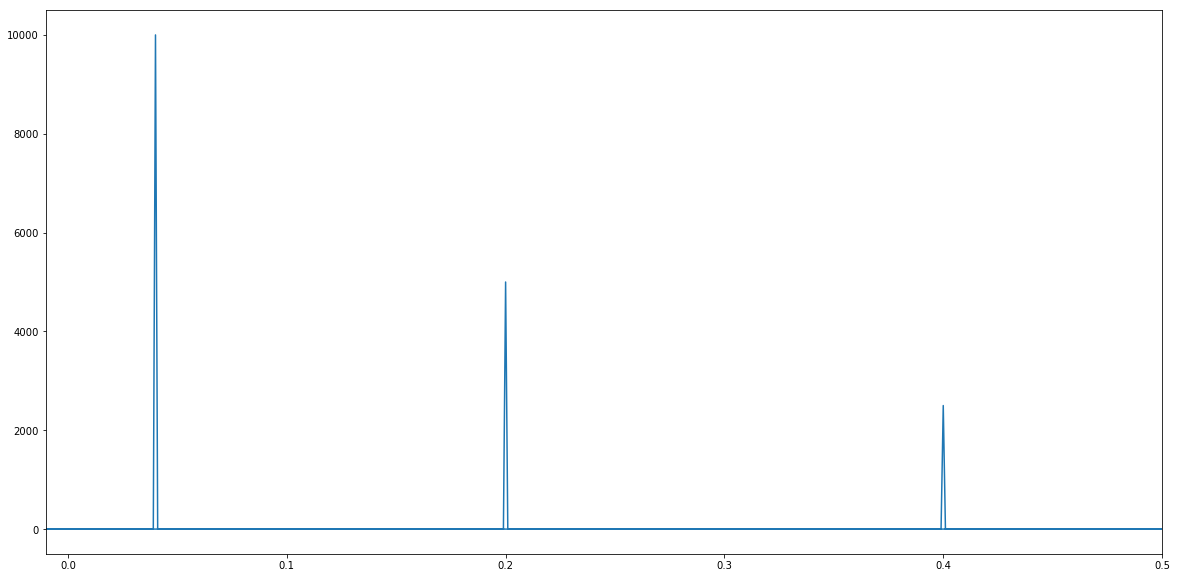

2/50: 0.04 | 2/10: 0.2 | 2/5: 0.4


In [13]:
#http://de.mathworks.com/help/matlab/ref/fft.html?searchHighlight=fft
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fft.html
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
#https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html?highlight=fft

xf=np.fft.fft(x2)   # 1D FFT without noise

timestep=0.1
freq = np.fft.fftfreq(x2.shape[0], d=timestep)

print( freq.shape, xf.shape)

plt.figure(figsize=(20,10))
plt.plot(freq,np.abs(xf))
#plt.plot(freq,np.abs(xf),'r.')

#plt.xlim(0,6000)
plt.xlim(-0.01,0.5)
plt.show()
print( '2/50: {} | 2/10: {} | 2/5: {}'.format(2/50 ,2/10,2/5))

(10000,) (10000,)


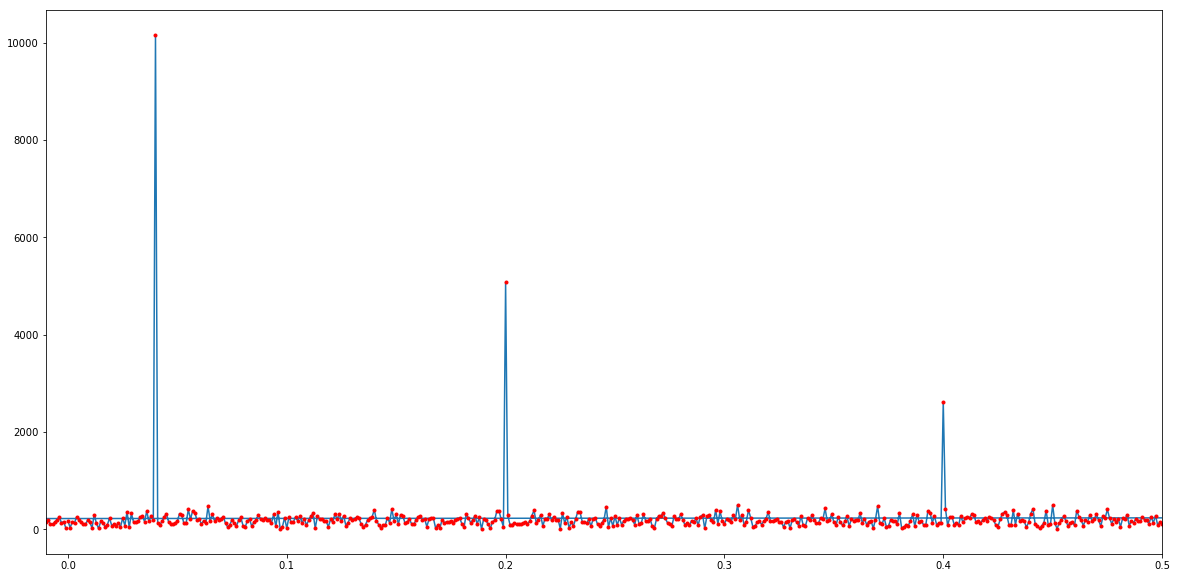

2/50: 0.04 | 2/10: 0.2 | 2/5: 0.4


In [14]:
#http://de.mathworks.com/help/matlab/ref/fft.html?searchHighlight=fft
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fft.html
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
#https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html?highlight=fft

xf=np.fft.fft(x3)   # 1D FFT with noise
timestep=0.1
freq = np.fft.fftfreq(x3.shape[0], d=timestep)

print( freq.shape, xf.shape)

plt.figure(figsize=(20,10))
plt.plot(freq,np.abs(xf))
plt.plot(freq,np.abs(xf),'r.')

#plt.xlim(0,6000)
plt.xlim(-0.01,0.5)
plt.show()
print( '2/50: {} | 2/10: {} | 2/5: {}'.format(2/50 ,2/10,2/5))

(10000,) (10000,)


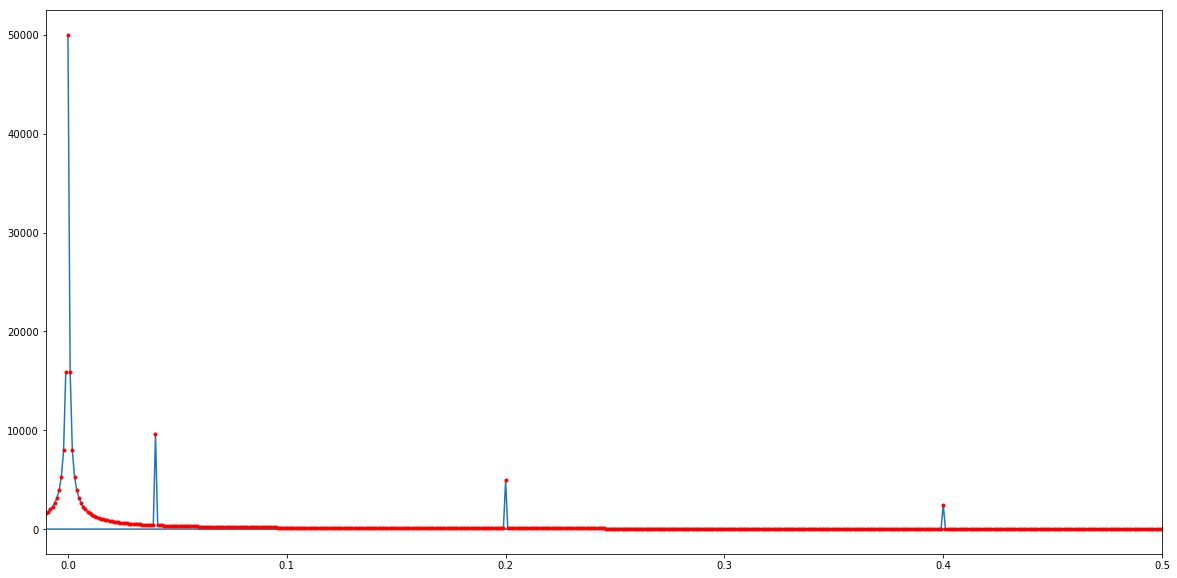

2/50: 0.04 | 2/10: 0.2 | 2/5: 0.4


In [15]:
#http://de.mathworks.com/help/matlab/ref/fft.html?searchHighlight=fft
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fft.html
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
#https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html?highlight=fft

xf=np.fft.fft(x4)    # 1D FFT with trend!!!

timestep=0.1
freq = np.fft.fftfreq(x4.shape[0], d=timestep)

print( freq.shape, xf.shape)

plt.figure(figsize=(20,10))
plt.plot(freq,np.abs(xf))
plt.plot(freq,np.abs(xf),'r.')

#plt.xlim(0,6000)
plt.xlim(-0.01,0.5)
plt.show()
print( '2/50: {} | 2/10: {} | 2/5: {}'.format(2/50 ,2/10,2/5))

(10000,) (10000,)


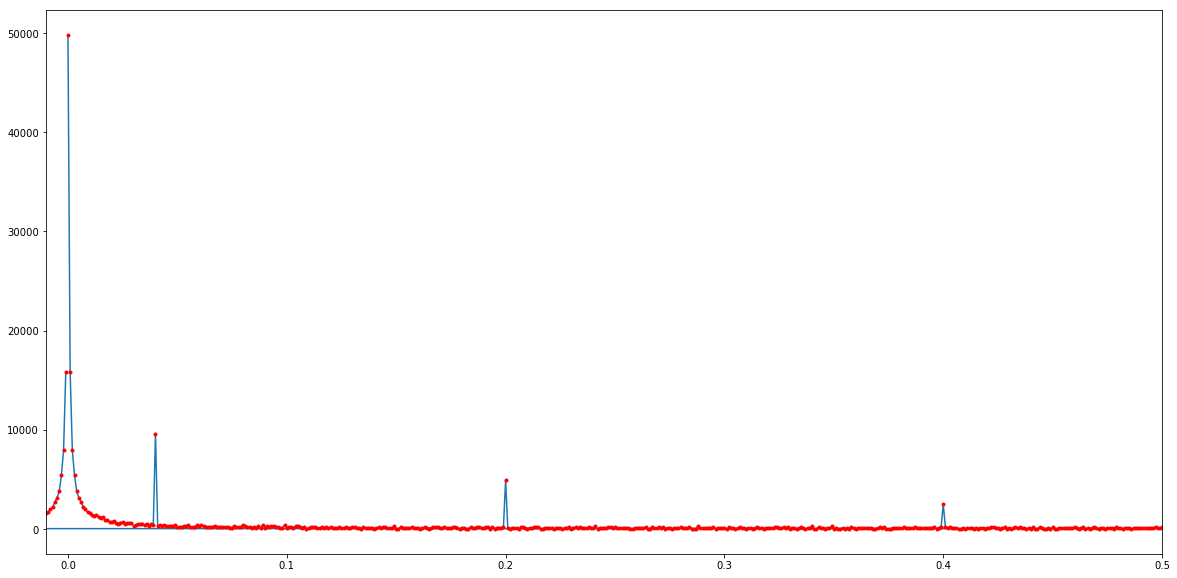

2/50: 0.04 | 2/10: 0.2 | 2/5: 0.4


In [16]:
#http://de.mathworks.com/help/matlab/ref/fft.html?searchHighlight=fft
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fft.html
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
#https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html?highlight=fft

xf=np.fft.fft(x5)   # Signal with a trend and noise

timestep=0.1
freq = np.fft.fftfreq(x5.shape[0], d=timestep)

print( freq.shape, xf.shape)

plt.figure(figsize=(20,10))
plt.plot(freq,np.abs(xf))
plt.plot(freq,np.abs(xf),'r.')
#plt.xlim(0,6000)
plt.xlim(-0.01,0.5)
plt.show()
print( '2/50: {} | 2/10: {} | 2/5: {}'.format(2/50 ,2/10,2/5))

The peaks in the Fourier Spectrum are exactly the freuquencies I used to generate the signals above...

if noise is in the signal than the spectrum is also noisy

What would a 2D Signal look like

- instead of an image I can use a matrix

we can use a matrix